---
title: "직업 데이터 분석 및 전처리 실전 가이드"
description: "크롤링한 직업 데이터를 효과적으로 전처리하고 분석하는 방법을 소개합니다. pandas와 seaborn을 활용한 데이터 처리부터 시각화까지, 실용적인 팁을 제공합니다."
headline: "크롤링한 직업 데이터를 전처리하는 방법"
categories: 직업(job) 데이터 전처리 및 분석(EDA) 하기
tags: [데이터 전처리, 크롤링, 데이터프레임, pandas, 시각화, 결측치, 클러스터링, TF-IDF, seaborn, matplotlib]
comments: true
published: true
use_math: true
typora-root-url: ../
---

# Neo4j **vector**검색을 통해 **직업(job)** 검색하기

## TL;DR

- Neo4j는 기본 벡터 검색을 핵심 데이터 기능에 통합합니다.

- 암시적 벡터 관계와 명시적 그래프 관계를 결합하면 정확도가 향상됩니다.

- 벡터는 단어와 패턴의 상황별 이해를 용이하게 합니다.

- Neo4j의 기술은 벡터와 지식 그래프의 이점을 활용하여 더욱 풍부한 통찰력을 제공합니다.

## TOC

### 크롤링한 직업데이터 전처리하기

### Neo4j DB란

### Neo4j에 데이터 로드하기

### 간단한 cypher 쿼리를 통해 직업검색하기

### Neo4j에 Full-text index(keyword search) 생성하기

### Neo4j에 vector index(Semantic search) 생성하기

### Langserve에 통합하기

### 참고문서

이 글의 시리즈는 `Neo4j의 vector검색을 통해 직업(job) 검색`하는 어플리케이션을 구축하는 과정에 대한 시리즈입니다.

이 시리즈의 시작은 크롤링한 직업 데이터를 효과적으로 전처리하고 분석하는 방법을 소개하는 것을 목적으로 하며 pandas와 seaborn을 활용한 데이터 처리부터 시각화까지, 실용적인 팁을 제공합니다.

이번 데이터 전처리에 대한 내용을 시작으로 
- Neo4j에 전처리한 데이터를 로드하기
- 간단한 cypher 쿼리를 통해 직업검색하기
- Neo4j에 Full-text index(keyword search) 생성하기
- Neo4j에 vector index(Semantic search) 생성하기
- Langserve에 통합하기

순으로 글을 발행해나갈 예정입니다.


**주요내용**
- 📊 **데이터 전처리**: 워크넷에서 크롤링한 직업 데이터를 pandas로 전처리하는 방법
- 🧹 **결측치 처리**: 결측치를 식별하고 적절하게 처리하는 기술
- 📈 **데이터 시각화**: seaborn과 matplotlib을 사용한 데이터 시각화 기법
- 🤖 **자동화된 분석**: TF-IDF와 클러스터링을 통한 산업 분야 자동 분류

# EP 1: 크롤링한 직업데이터 전처리하기
---
직업관련 데이터는 [워크넷](https://www.work.go.kr/seekWantedMain.do)에서 크롤링한 데이터를 기반으로 하고 있습니다.

다음으로 데이터의 컬럼들을 살펴보고 아래의 컬럼을 전처리하는 과정을 진행해보도록 하겠습니다.

`VolunteerExperience`
`CompanyPayment`
`CompanyWorktype`
`EmploymentType`
`Benefits`

이 함수는 `pandas` 라이브러리를 사용하여 `data/jobs_worknet.csv` 파일을 읽고, 데이터프레임에서 'Link' 열을 제거한 후 상위 5개 행을 출력합니다. `pd.read_csv` 함수를 사용하여 CSV 파일을 읽고, `drop` 메소드를 사용하여 특정 열을 제거합니다. 마지막으로, `head` 메소드를 호출하여 결과를 확인합니다.

In [1]:
import pandas as pd

df = pd.read_csv("data/jobs_worknet.csv")

df.drop(columns=['Link'], axis=1, inplace=True) # 'Link' 열을 제거합니다.
df.head() # 데이터프레임의 상위 5개 행을 출력합니다.

,Title,CompanyName,CompanyIndustry,CompanySize,VolunteerExperience,VolunteerEducation,CompanyLocation,CompanyPayment,CompanyWorktype,EmploymentType,Benefits
0,단순 포장반직원 모집합니다,주식회사 농생우창,사료 도매업,중소기업,신입,학력무관,충청북도 진천군 이월면 월촌1길 173-13,월급\n \n \n...,주 5일 근무,기간의 정함이 없는 근로계약,기숙사제공\n \n ...
1,단순포장 및 락크작업,제이비(주),"도금, 착색 및 기타 표면처리강재 제조업",중소기업,관계없음,학력무관,"인천광역시 남동구 남동대로155번길 56, 제이비(주) (고잔동)",월급\n \n \n...,주 5일 근무,기간의 정함이 없는 근로계약,식사제공(중식비지급)
2,육류 가공 식당납품,유안축산,육류 가공식품 도매업,NaN,관계없음,학력무관,"경기도 안산시 상록구 장하로 94, 1층 (장하동)",월급\n \n \n...,주 5일 근무,기간의 정함이 없는 근로계약,식사제공(1식)
3,[이천시 가좌리] 신축빌라 공사현장 잡역부 모집,주식회사에스알종합건설,단독 주택 건설업,중소기업,경력\n\t \t\n\t ...,학력무관,경기도 이천시 부발읍 가좌로 42,월급\n \n \n...,주 6일 근무,기간의 정함이 없는 근로계약,식사제공(중식비지급)
4,생산직 채용(당사 제품 생산) 외국인 우대,(주)신화,구조용 금속 판제품 및 공작물 제조업,중소기업,관계없음,학력무관,충청남도 논산시 강경읍 농공단지로 22,월급\n \n \n...,주 5일 근무,기간의 정함이 없는 근로계약,기숙사제공\n 통근버스제공\n ...


``df.keys()`` 함수는 ``DataFrame``의 모든 열(컬럼) 이름을 반환합니다. 이 함수는 데이터의 구조를 파악할 때 유용하게 사용됩니다.

In [2]:
df.keys()  # DataFrame의 모든 열 이름을 반환합니다.

Index(['Title', 'CompanyName', 'CompanyIndustry', 'CompanySize',
       'VolunteerExperience', 'VolunteerEducation', 'CompanyLocation',
       'CompanyPayment', 'CompanyWorktype', 'EmploymentType', 'Benefits'],
      dtype='object')

#### 잡과 관련된 항목과 회사와 관련된 항목을 **구분**

- 회사와 관련된 키: CompanyName, CompanyIndustry, CompanySize, CompanyLocation

- 잡과 관련된 키: Title, VolunteerExperience, VolunteerEducation, CompanyPayment, CompanyWorktype, EmploymentType, Benefits

잡과 관련된 키의 이름을 잡에 관련하여 변경

이 함수는 데이터프레임 `df`의 열 이름을 변경하는 데 사용됩니다. `rename` 메서드는 `columns` 매개변수를 통해 새 열 이름을 지정하며, `inplace=True` 옵션을 사용하여 변경사항을 원본 데이터프레임에 바로 적용합니다. 변경된 열 이름은 다음과 같습니다:

- `Title`을 `JobTitle`로 변경
- `VolunteerExperience`를 `JobVolunteerExperience`로 변경
- `VolunteerEducation`을 `JobVolunteerEducation`로 변경
- `CompanyPayment`를 `JobPayment`로 변경
- `CompanyWorktype`을 `JobWorktype`로 변경
- `EmploymentType`을 `JobEmploymentType`로 변경
- `Benefits`를 `JobBenefits`로 변경

마지막으로, `df.keys()`를 호출하여 변경된 열 이름을 확인합니다.

In [3]:
# 잡과 관련된 키 이름을 수정

df.rename(columns={
    'Title': 'JobTitle',
    'VolunteerExperience': 'JobVolunteerExperience',
    'VolunteerEducation': 'JobVolunteerEducation',
    'CompanyPayment': 'JobPayment',
    'CompanyWorktype': 'JobWorktype',
    'EmploymentType': 'JobEmploymentType',
    'Benefits': 'JobBenefits'
}, inplace=True)

df.keys()

Index(['JobTitle', 'CompanyName', 'CompanyIndustry', 'CompanySize',
       'JobVolunteerExperience', 'JobVolunteerEducation', 'CompanyLocation',
       'JobPayment', 'JobWorktype', 'JobEmploymentType', 'JobBenefits'],
      dtype='object')

함수 `df.head()`는 데이터프레임에서 처음 다섯 행을 반환합니다. 이 함수는 데이터의 구조를 빠르게 파악하고자 할 때 유용하게 사용됩니다. 기본적으로 처음 다섯 행을 반환하지만, 괄호 안에 다른 숫자를 지정하여 반환하고자 하는 행의 수를 조정할 수 있습니다.

In [4]:
df.head() # 데이터프레임의 처음 다섯 행을 출력합니다.

,JobTitle,CompanyName,CompanyIndustry,CompanySize,JobVolunteerExperience,JobVolunteerEducation,CompanyLocation,JobPayment,JobWorktype,JobEmploymentType,JobBenefits
0,단순 포장반직원 모집합니다,주식회사 농생우창,사료 도매업,중소기업,신입,학력무관,충청북도 진천군 이월면 월촌1길 173-13,월급\n \n \n...,주 5일 근무,기간의 정함이 없는 근로계약,기숙사제공\n \n ...
1,단순포장 및 락크작업,제이비(주),"도금, 착색 및 기타 표면처리강재 제조업",중소기업,관계없음,학력무관,"인천광역시 남동구 남동대로155번길 56, 제이비(주) (고잔동)",월급\n \n \n...,주 5일 근무,기간의 정함이 없는 근로계약,식사제공(중식비지급)
2,육류 가공 식당납품,유안축산,육류 가공식품 도매업,NaN,관계없음,학력무관,"경기도 안산시 상록구 장하로 94, 1층 (장하동)",월급\n \n \n...,주 5일 근무,기간의 정함이 없는 근로계약,식사제공(1식)
3,[이천시 가좌리] 신축빌라 공사현장 잡역부 모집,주식회사에스알종합건설,단독 주택 건설업,중소기업,경력\n\t \t\n\t ...,학력무관,경기도 이천시 부발읍 가좌로 42,월급\n \n \n...,주 6일 근무,기간의 정함이 없는 근로계약,식사제공(중식비지급)
4,생산직 채용(당사 제품 생산) 외국인 우대,(주)신화,구조용 금속 판제품 및 공작물 제조업,중소기업,관계없음,학력무관,충청남도 논산시 강경읍 농공단지로 22,월급\n \n \n...,주 5일 근무,기간의 정함이 없는 근로계약,기숙사제공\n 통근버스제공\n ...


함수 `df.describe()`는 데이터프레임 `df`에 대한 기초 통계량을 반환합니다. 이는 데이터의 개수, 평균, 표준편차, 최소값, 25% 백분위수, 중앙값(50% 백분위수), 75% 백분위수, 최대값을 포함합니다. 이를 통해 데이터의 분포와 중심 경향성을 빠르게 파악할 수 있습니다.

In [5]:
# 데이터의 기초 통계량 보기
df.describe()

,JobTitle,CompanyName,CompanyIndustry,CompanySize,JobVolunteerExperience,JobVolunteerEducation,CompanyLocation,JobPayment,JobWorktype,JobEmploymentType,JobBenefits
count,1000,896,896,602,896,896,896,896,896,896,744
unique,952,835,332,4,23,15,849,275,6,4,68
top,농업단순노무자 모집,패러데이주식회사,그 외 자동차용 신품 부품 제조업,중소기업,관계없음,학력무관,경기도 김포시 양촌읍 황금1로 62,시급\n \n \n...,주 5일 근무,기간의 정함이 없는 근로계약,식사제공(1식)
freq,7,4,36,552,634,798,4,185,694,757,261


함수 `df.info()`는 DataFrame `df`의 요약 정보를 출력합니다. 이는 데이터의 각 열에 대한 데이터 타입, 비어 있지 않은 값의 수 등을 포함합니다. 이를 통해 데이터의 전반적인 구조와 결측치의 유무를 빠르게 파악할 수 있습니다.

In [6]:
# 데이터의 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   JobTitle                1000 non-null   object
 1   CompanyName             896 non-null    object
 2   CompanyIndustry         896 non-null    object
 3   CompanySize             602 non-null    object
 4   JobVolunteerExperience  896 non-null    object
 5   JobVolunteerEducation   896 non-null    object
 6   CompanyLocation         896 non-null    object
 7   JobPayment              896 non-null    object
 8   JobWorktype             896 non-null    object
 9   JobEmploymentType       896 non-null    object
 10  JobBenefits             744 non-null    object
dtypes: object(11)
memory usage: 86.1+ KB


이 함수는 데이터프레임 `df`에서 각 열별로 결측치의 개수를 합산하여 반환합니다. `isnull()` 메소드는 데이터프레임의 각 요소가 결측치인지 여부를 불리언 값으로 반환하며, `sum()` 메소드는 이 불리언 값들을 열별로 합산하여 결측치의 총 개수를 계산합니다.

In [7]:
# 결측치 확인
df.isnull().sum()

JobTitle                    0
CompanyName               104
CompanyIndustry           104
CompanySize               398
JobVolunteerExperience    104
JobVolunteerEducation     104
CompanyLocation           104
JobPayment                104
JobWorktype               104
JobEmploymentType         104
JobBenefits               256
dtype: int64

이 문서는 `seaborn`과 `matplotlib` 라이브러리를 사용하여 데이터 시각화를 준비하는 과정을 설명합니다. `matplotlib`의 `rc` 함수를 사용하여 한글 폰트를 설정하고, `plt.rcParams`를 통해 축의 음수 표시 문제를 해결합니다. 이 설정은 그래프에서 한글을 올바르게 표시하고, 음수 값을 올바르게 처리하기 위해 필요합니다.

In [8]:
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt

%matplotlib inline

# 한글 폰트 적용
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

#### `JobVolunteerExperience` 컬럼 전처리
---
단계별로 생각해 봅시다.

이 함수는 `DataFrame`의 `JobVolunteerExperience` 컬럼에 대한 기술 통계를 출력합니다. `describe()` 메소드는 해당 컬럼의 개수, 고유값의 수, 최빈값, 최빈값이 나타난 횟수 등의 기초 통계 정보를 제공합니다.

In [9]:
# JobVolunteerExperience 컬럼에 대한 기술 통계를 출력합니다.
df['JobVolunteerExperience'].describe()

count      896
unique      23
top       관계없음
freq       634
Name: JobVolunteerExperience, dtype: object

이 함수는 DataFrame의 `JobVolunteerExperience` 열에서 결측치의 총 수를 계산합니다. `isnull().sum()` 메서드를 사용하여 결측치를 찾고, 그 수를 합산합니다. 이는 데이터 전처리 단계에서 결측치를 처리하기 전에 결측치의 양을 파악하는 데 유용합니다.

In [10]:
# JobVolunteerExperience 결측치
df['JobVolunteerExperience'].isnull().sum()

104

`JobVolunteerExperience` 컬럼의 데이터는
- 관계없음
- 신입
- 경력(최소 2년 0개월) 필수, 경력(최소 1년 0개월) 우대 ...
- null

등으로 되어 있습니다.

"null" 인 데이터는 "관계없음"과 같은 의미입니다.
경력과 관련해서는 x년 "우대"와 x년 "필수"는 구별할 수 있는 의미 있는 데이터로 보여집니다.

이 함수는 DataFrame 내의 특정 열(`JobVolunteerExperience`)에서 결측치를 찾아 이를 '관계없음'으로 대체합니다. `fillna` 메소드의 `inplace=True` 파라미터는 원본 DataFrame을 직접 수정하여 별도의 할당 없이 변경사항을 적용합니다.

In [11]:
# 결측치 처리
df['JobVolunteerExperience'].fillna('관계없음', inplace=True)

/var/folders/8l/h9gthwnn40gcs_zb4k3g4_z40000gn/T/ipykernel_15496/3204591407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobVolunteerExperience'].fillna('관계없음', inplace=True)


이 함수는 문자열 데이터에서 경력 정보를 추출하여 필수 경력과 우대 경력을 개월 단위로 계산합니다. `extract_experience` 함수는 정규 표현식을 사용하여 문자열에서 연수와 개월 정보를 찾아내고, 이를 기반으로 전체 경력 기간을 개월로 환산합니다. 데이터에 '우대'라는 단어가 포함되어 있으면 해당 경력을 우대 경력으로 간주하고, 그렇지 않으면 필수 경력으로 처리합니다. 이후, `pandas` 데이터프레임의 각 행에 대해 이 함수를 적용하여 'JobVolunteerExperience' 컬럼에서 경력 정보를 파싱하고, 새로운 컬럼 'RequiredExperienceMonths'와 'PreferredExperienceMonths'에 필수 경력과 우대 경력을 개월 단위로 저장합니다.

In [12]:
import re

# 경력 필요 연수 및 유형 추출 함수
def extract_experience(data):
    # 불필요한 공백 제거
    data = re.sub(r'\s+', ' ', data).strip()
    # 정규 표현식으로 연수 정보 추출
    match = re.search(r'(\d+)\s*년\s*(\d+)\s*개월', data)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        # 전체 경력을 개월로 환산
        total_months = years * 12 + months
    else:
        total_months = None
    
    if '우대' in data:
        return data, None, total_months  # 필수 경력 없음, 우대 경력 있음
    else:
        return data, total_months, None  # 필수 경력 있음, 우대 경력 없음

# 새로운 컬럼 생성
df['RequiredExperienceMonths'] = None
df['PreferredExperienceMonths'] = None

# 경력 데이터 파싱
for index, row in df.iterrows():
    if '년' in row['JobVolunteerExperience']:
        volunteer_experience, required_years, preferred_years = extract_experience(row['JobVolunteerExperience'])
        df.at[index, 'JobVolunteerExperience'] = volunteer_experience
        df.at[index, 'RequiredExperienceMonths'] = required_years
        df.at[index, 'PreferredExperienceMonths'] = preferred_years

이 함수는 DataFrame `df`에서 'JobVolunteerExperience' 컬럼의 값이 '관계없음' 또는 '신입'이 아닌 행을 필터링합니다. 필터링된 행에서는 'JobVolunteerExperience', 'RequiredExperienceMonths', 'PreferredExperienceMonths' 컬럼만 선택하여 새로운 DataFrame `filtered_df`를 생성합니다. 마지막으로 `filtered_df`의 처음 10개 행을 출력합니다.

In [13]:
# 데이터 확인

# '관계없음'이나 '신입'이 아닌 경우 필터링 및 특정 컬럼 선택
filtered_df = df.loc[~df['JobVolunteerExperience'].isin(['관계없음', '신입']), 
                     ['JobVolunteerExperience', 'RequiredExperienceMonths', 'PreferredExperienceMonths']]

# 결과 출력
filtered_df[:10]

,JobVolunteerExperience,RequiredExperienceMonths,PreferredExperienceMonths
3,경력 (최소 1년 0 개월 이상) 우대,None,12
10,경력 (최소 1년 12 개월 이상) 우대,None,24
26,경력 (최소 1년 0 개월 이상) 우대,None,12
43,경력 (최소 2년 0 개월 이상) 필수,24,None
50,경력 (최소 10년 0 개월 이상) 필수,120,None
65,경력 (최소 10년 0 개월 이상) 필수,120,None
80,경력 (최소 0년 3 개월 이상) 우대,None,3
84,경력 (최소 2년 0 개월 이상) 필수,24,None
88,경력 (최소 1년 0 개월 이상) 우대,None,12
124,경력 (최소 1년 3 개월 이상) 우대,None,15


이 함수는 DataFrame에서 특정 조건을 만족하는 행을 필터링하고, 선택된 행에서 특정 컬럼만을 선택하는 작업을 수행합니다. `df.loc`을 사용하여 `'JobVolunteerExperience'` 컬럼의 값이 '우대'로 끝나는 행을 필터링합니다. 그 후, `'JobVolunteerExperience'`, `'RequiredExperienceMonths'`, `'PreferredExperienceMonths'` 컬럼만을 선택합니다. 마지막으로, 결과 DataFrame의 처음 10행을 출력합니다.

In [14]:
# '우대'로 끝나는 행 필터링 및 특정 컬럼 선택
filtered_df = df.loc[df['JobVolunteerExperience'].str.endswith('우대'), 
                     ['JobVolunteerExperience', 'RequiredExperienceMonths', 'PreferredExperienceMonths']]

filtered_df[:10]

,JobVolunteerExperience,RequiredExperienceMonths,PreferredExperienceMonths
3,경력 (최소 1년 0 개월 이상) 우대,None,12
10,경력 (최소 1년 12 개월 이상) 우대,None,24
26,경력 (최소 1년 0 개월 이상) 우대,None,12
80,경력 (최소 0년 3 개월 이상) 우대,None,3
88,경력 (최소 1년 0 개월 이상) 우대,None,12
124,경력 (최소 1년 3 개월 이상) 우대,None,15
145,경력 (최소 1년 0 개월 이상) 우대,None,12
150,경력 (최소 1년 0 개월 이상) 우대,None,12
155,경력 (최소 5년 0 개월 이상) 우대,None,60
167,경력 (최소 0년 1 개월 이상) 우대,None,1


이 함수는 DataFrame에서 `JobVolunteerExperience` 컬럼의 값이 '필수'로 끝나는 행들을 필터링합니다. 그 후, `JobVolunteerExperience`, `RequiredExperienceMonths`, `PreferredExperienceMonths` 컬럼들만 선택하여 새로운 DataFrame을 생성합니다. 마지막으로, 생성된 DataFrame의 처음 10개 행을 반환합니다.

In [15]:
# '필수'로 끝나는 행 필터링 및 특정 컬럼 선택
filtered_df = df.loc[df['JobVolunteerExperience'].str.endswith('필수'), 
                     ['JobVolunteerExperience', 'RequiredExperienceMonths', 'PreferredExperienceMonths']]


filtered_df[:10]

,JobVolunteerExperience,RequiredExperienceMonths,PreferredExperienceMonths
43,경력 (최소 2년 0 개월 이상) 필수,24,None
50,경력 (최소 10년 0 개월 이상) 필수,120,None
65,경력 (최소 10년 0 개월 이상) 필수,120,None
84,경력 (최소 2년 0 개월 이상) 필수,24,None
140,경력 (최소 5년 0 개월 이상) 필수,60,None
157,경력 (최소 1년 0 개월 이상) 필수,12,None
161,경력 (최소 5년 0 개월 이상) 필수,60,None
170,경력 (최소 7년 0 개월 이상) 필수,84,None
172,경력 (최소 7년 0 개월 이상) 필수,84,None
196,경력 (최소 1년 0 개월 이상) 필수,12,None


`JobVolunteerEducation` 컬럼의 데이터는

- 학력무관: 80%
- 고졸 ~ 대졸(4년): 4%
- 대졸(2~3년) ~ 대졸(4년): 2%
- 기타 또는 null: 4%

등으로 되어 있습니다.

"null" 인 데이터는 "학력무관"과 같은 의미로 치환해서 결측치를 "학력무관"으로 채워넣도록 하겠습니다.

이 함수는 `DataFrame`의 특정 열에서 결측치를 처리합니다. `fillna` 메소드를 사용하여 `JobVolunteerEducation` 열의 모든 결측치를 '학력무관'으로 대체하며, `inplace=True` 파라미터는 원본 `DataFrame`을 직접 수정하도록 합니다.

In [16]:
# 결측치 처리
df['JobVolunteerEducation'].fillna('학력무관', inplace=True)

/var/folders/8l/h9gthwnn40gcs_zb4k3g4_z40000gn/T/ipykernel_15496/4216291592.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobVolunteerEducation'].fillna('학력무관', inplace=True)


이 함수는 DataFrame 내의 `'JobVolunteerEducation'` 열에 대한 기술 통계량을 요약하여 출력합니다. 여기에는 개수(count), 평균(mean), 표준편차(std), 최소값(min), 사분위수(25%, 50%, 75%) 및 최대값(max)이 포함될 수 있습니다. 이는 데이터의 분포와 중심 경향성을 빠르게 이해하는 데 유용합니다.

In [17]:
# 'JobVolunteerEducation' 열의 기술 통계량을 요약하여 출력합니다.
df['JobVolunteerEducation'].describe()

count     1000
unique      15
top       학력무관
freq       902
Name: JobVolunteerEducation, dtype: object

#### `JobPayment` 컬럼 전처리

`JobPayment` 컬럼의 데이터는 

- 시급 9,860원 - 10,000원
- 월급 210만원 ~ 230만원
- 월급 238만원 이상
- 연봉 3,0000 만원이상
- null

등의 형태로 되어 있습니다.


이 데이터를 한가지 단위(시급, 월급, 연봉)로 통일시켜 줄 필요가 있을 것 같습니다.
다음은 `JobPayment` 컬럼의 값을 월급으로 환산하여 `MinMonthlyPayment`, `MaxMonthlyPayment` 컬럼으로 데이터 전처리 하는 코드입니다.

이 함수는 급여 정보 문자열을 분석하여 급여의 최소값과 최대값을 추출합니다. 
`parse_payment` 함수는 결측치를 처리하고, 급여 정보에서 불필요한 공백을 제거한 후 숫자를 추출합니다. 
추출된 숫자를 바탕으로 시급, 일급, 월급, 연봉을 월급으로 환산하여 최소값과 최대값을 계산합니다. 

이 과정에서 '만원' 단위가 있는 경우 원으로 변환하여 계산합니다. 
처리할 수 없는 형식의 급여 정보가 주어진 경우, 해당 정보를 출력하고 `np.nan`을 반환합니다. 

마지막으로, `df` 데이터프레임에 `JobPayment`, `MinMonthlyPayment`, `MaxMonthlyPayment` 컬럼을 추가하여 각 직무의 급여 정보를 업데이트합니다.

In [18]:
import numpy as np

# 결측치 처리
# df['JobPayment'].fillna('정보 없음', inplace=True)

# 금액 추출 및 범위 설정
def parse_payment(payment):
    if pd.isnull(payment):
        return np.nan, np.nan
    
    # 불필요한 공백 제거
    payment = re.sub(r'\s+', ' ', payment).strip()
        
    # 숫자 추출
    numbers = re.findall(r'\d+', payment.replace(',', ''))
    numbers = [int(num) for num in numbers]

    if '시급' in payment:
        # 시급을 월급으로 가정하여 환산
        monthly = [num * 8 * 20 for num in numbers]  # 8시간, 20일 근무 가정
    elif '일급' in payment:
        # 일급을 월급으로 가정하여 환산
        if '만원' in payment:
            monthly = [num * 20 * 10000 for num in numbers]  # '만원'을 '원'으로 변환
        else:
            monthly = [num * 20 for num in numbers]  # 20일 근무 가정
    elif '월급' in payment:
        # 월급의 경우 단위 확인 후 환산
        if '만원' in payment:
            monthly = [num * 10000 for num in numbers]  # '만원'을 '원'으로 변환
        else:
            monthly = numbers
    elif '연봉' in payment:
        # 연봉을 월급으로 환산
        if '만원' in payment:
            monthly = [num * 10000 // 12 for num in numbers]  # '만원'을 '원'으로 변환 후 12로 나누기
        else:
            monthly = [num // 12 for num in numbers]  # 연봉을 12로 나누어 월급으로 환산
    else:
        # 처리할 수 없는 형식이 주어진 경우
        print(payment)
        return payment, np.nan, np.nan

            
    if len(monthly) > 1:
        return payment, min(monthly), max(monthly)
    elif '이상' in payment:
        return payment, monthly[0], None
    else:
        return payment, monthly[0], monthly[0]
    
# 새로운 컬럼 추가
df[['JobPayment', 'MinMonthlyPayment', 'MaxMonthlyPayment']] = df['JobPayment'].apply(lambda x: pd.Series(parse_payment(x)))

이 함수는 데이터프레임 `df`에서 특정 열(`'JobPayment'`, `'MinMonthlyPayment'`, `'MaxMonthlyPayment'`)의 처음 10개 행을 선택하여 반환합니다. 이는 데이터의 부분 집합을 조회하는 데 사용되며, 특히 데이터 분석 초기 단계에서 데이터의 구조와 값의 범위를 빠르게 이해하는 데 유용합니다.

In [19]:
# 데이터프레임에서 'JobPayment', 'MinMonthlyPayment', 'MaxMonthlyPayment' 열의 처음 10개 행을 선택합니다.
df[['JobPayment', 'MinMonthlyPayment', 'MaxMonthlyPayment']][0:10] 

,JobPayment,MinMonthlyPayment,MaxMonthlyPayment
0,월급 210만원 ~ 230만원,2100000.0,2300000.0
1,월급 206만원 ~ 230만원,2060000.0,2300000.0
2,월급 280만원 ~ 300만원,2800000.0,3000000.0
3,월급 350만원 ~ 350만원,3500000.0,3500000.0
4,월급 206만원 이상,2060000.0,NaN
5,월급 216만원 ~ 216만원,2160000.0,2160000.0
6,"연봉 3,000만원 이상",2500000.0,NaN
7,월급 206만원 이상,2060000.0,NaN
8,월급 206만원 이상,2060000.0,NaN
9,월급 220만원 ~ 250만원,2200000.0,2500000.0


이 함수는 데이터프레임의 특정 열(`MinMonthlyPayment`, `MaxMonthlyPayment`)에 대한 기술통계를 요약하여 반환합니다. `describe()` 메서드는 요약 통계를 제공하여, 데이터의 중심 경향, 분산 및 모양을 빠르게 이해할 수 있게 해줍니다. 이는 데이터 분석 초기 단계에서 유용하게 사용됩니다.

In [20]:
# 데이터프레임의 'MinMonthlyPayment'와 'MaxMonthlyPayment' 열에 대한 기술통계 요약을 반환합니다.
df[['MinMonthlyPayment', 'MaxMonthlyPayment']].describe() 

,MinMonthlyPayment,MaxMonthlyPayment
count,8.960000e+02,4.450000e+02
mean,2.243441e+06,2.635997e+06
std,1.641281e+06,8.701816e+05
min,5.500000e+05,5.500000e+05
25%,1.577600e+06,1.920000e+06
50%,2.100000e+06,2.500000e+06
75%,2.500000e+06,3.200000e+06
max,4.800000e+07,6.000000e+06


이 코드는 데이터프레임 `df` 내의 `MinMonthlyPayment` 및 `MaxMonthlyPayment` 열의 분포를 시각화하기 위해 사용됩니다. 두 열 각각에 대해 히스토그램을 생성하며, `sns.histplot` 함수를 사용하여 KDE(Kernel Density Estimate) 곡선을 함께 표시합니다. 첫 번째 히스토그램은 `MinMonthlyPayment`의 분포를 파란색으로, 두 번째 히스토그램은 `MaxMonthlyPayment`의 분포를 빨간색으로 나타냅니다. 각 히스토그램은 30개의 구간(bins)으로 구성되어 있으며, x축은 월별 지불금의 크기를, y축은 해당 지불금 크기의 빈도를 나타냅니다.

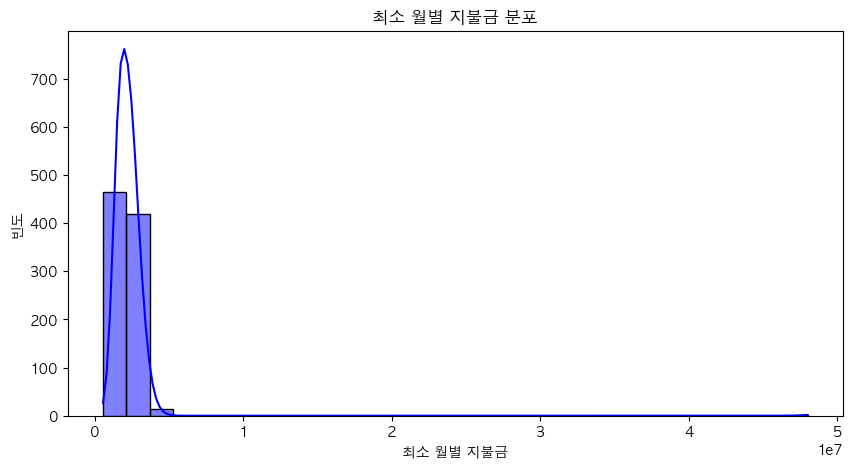

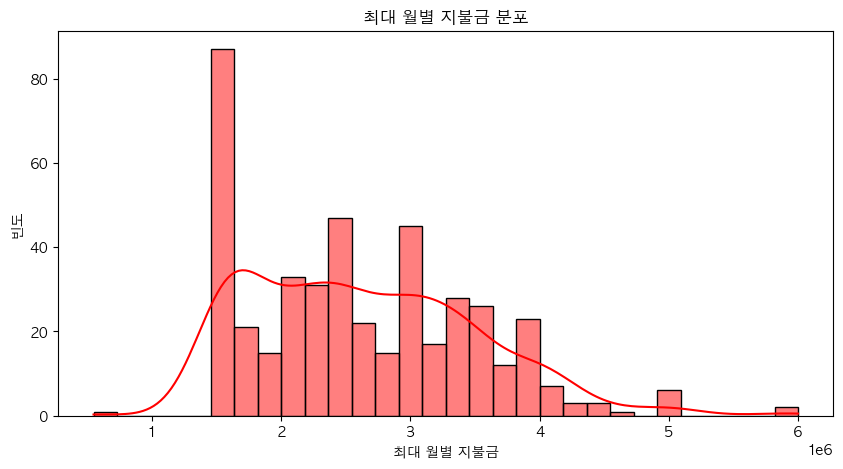

In [21]:
# 최소 월별 지불금과 최대 월별 지불금의 분포를 보여주는 히스토그램

plt.figure(figsize=(10, 5))
sns.histplot(df['MinMonthlyPayment'], bins=30, kde=True, color='blue')
plt.title('최소 월별 지불금 분포')
plt.xlabel('최소 월별 지불금')
plt.ylabel('빈도')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['MaxMonthlyPayment'], bins=30, kde=True, color='red')
plt.title('최대 월별 지불금 분포')
plt.xlabel('최대 월별 지불금')
plt.ylabel('빈도')
plt.show()

이 코드는 `pandas` 라이브러리를 사용하여 데이터프레임 `df` 내의 `MinMonthlyPayment` 및 `MaxMonthlyPayment` 컬럼 간의 상관 관계를 계산하고, 이를 `print` 함수로 출력합니다. 그 후, `seaborn` 라이브러리의 `heatmap` 함수를 사용하여 상관 관계 행렬을 시각화합니다. 시각화에서는 `coolwarm` 컬러맵을 사용하며, 각 셀에는 상관 계수가 소수점 둘째 자리까지 표시됩니다. 마지막으로, `matplotlib`의 `plt.title` 함수를 사용하여 그래프의 제목을 설정하고 `plt.show()`로 그래프를 표시합니다.

#### `JobWorktype` 컬럼 전처리

`JobWorktype` 컬럼의 데이터는 

- "주 6일 근무"
- "주 5일 근무"
- "주 4일 근무"
- null

등의 형태로 되어 있습니다.

이 코드는 데이터프레임 `df`에서 'JobWorktype' 열에 대해 특정 조건을 만족하는 데이터를 필터링하고 처리하는 과정을 보여줍니다. 

먼저, `expected_work_types` 리스트에 정의된 근무 유형을 기준으로 하여, 이에 해당하지 않는 (`null`이 아니면서 예상된 근무 유형에 속하지 않는) 데이터를 찾습니다. 

그런 다음, 이러한 데이터에서 'JobWorktype' 열의 유니크한 값을 추출하여 중복 없는 근무 유형을 확인합니다. 이 과정은 데이터 정제 및 분석 단계에서 유용하게 사용될 수 있습니다.

In [23]:
expected_work_types = ['주 5일 근무', '주 6일 근무', '주 4일 근무']
non_null_data = pd.notnull(df['JobWorktype'])  # null이 아닌 데이터 선택
filter_unexpected = ~df['JobWorktype'].isin(expected_work_types) & non_null_data  # 조건 조합

# 예상하지 못한 데이터 추출
unexpected_data = df[filter_unexpected]

# 중복을 제거하고 유니크한 'JobWorktype' 값 출력
unique_unexpected_job_types = unexpected_data['JobWorktype'].unique()

unique_unexpected_job_types

array(['주 7일 근무', '주 2일 근무', '주 3일 근무'], dtype=object)

`JobWorktype` 컬럼의 데이터를 좀 더 구체적으로 확인해 봤을 때 '주 7일 근무', '주 2일 근무', '주 3일 근무'의 형태의 데이터가 있었음을 확인할 수 있었습니다.

결론적으로

`JobWorktype` 컬럼의 데이터는 
- "주 7일 근무"
- "주 6일 근무"
- "주 5일 근무"
- "주 4일 근무"
- "주 3일 근무"
- "주 2일 근무"
- null

등의 형태로 되어 있습니다.

또한 위의 데이터 내용을 봤을 때 `JobWorktype`이란 컬럼 이름보다 `WeeklyWorkdays`로 변경하여 주당 근무일 수를 명확하게 표현하는 게 더욱 나아보입니다.

이 함수는 DataFrame의 컬럼명을 변경하는 데 사용됩니다. `rename` 메서드는 `columns` 매개변수를 통해 변경할 컬럼명의 사전을 받으며, `inplace=True` 옵션을 사용하여 원본 DataFrame을 직접 수정합니다. 예를 들어, `{'JobWorktype': 'WeeklyWorkdays'}`는 'JobWorktype' 컬럼명을 'WeeklyWorkdays'로 변경합니다.

In [24]:
# 컬럼명 변경 예시
df.rename(columns={'JobWorktype': 'WeeklyWorkdays'}, inplace=True)

이 함수는 데이터프레임 `df` 내의 'WeeklyWorkdays' 열에서 가장 빈번하게 등장하는 값을 찾아 `most_common` 변수에 할당합니다. 이는 결측치를 처리하는 한 방법으로, 해당 열의 결측치를 가장 흔한 값으로 대체할 때 사용됩니다.

In [25]:
# 결측치 처리 - 가장 흔한 값으로 대체
most_common = df['WeeklyWorkdays'].mode()[0]  # 가장 많이 등장하는 근무 형태

most_common

'주 5일 근무'

`WeeklyWorkdays` 컬럼의 결측치를 처리하는 일반적인 방법은 대부분 "주 5일 근무"를 채택하고 있기 때문에 "주 5일 근무"로 대체하는 것도 나쁘지 않아 보입니다.

이 함수는 `df['WeeklyWorkdays']` 열의 결측치를 `most_common` 변수의 값으로 대체합니다. `inplace=True` 파라미터는 변경사항을 원본 데이터프레임에 바로 적용한다는 것을 의미합니다.

In [26]:
# 결측치 처리: 주 5일 근무
df['WeeklyWorkdays'].fillna(most_common, inplace=True)

/var/folders/8l/h9gthwnn40gcs_zb4k3g4_z40000gn/T/ipykernel_15496/4061089409.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WeeklyWorkdays'].fillna(most_common, inplace=True)


이 함수는 `DataFrame`의 `WeeklyWorkdays` 열에서 결측치의 총 개수를 계산합니다. `isna()` 메서드를 사용하여 결측치 여부를 불리언 값으로 반환하고, `sum()` 메서드로 이러한 불리언 값들의 합을 구하여 결측치의 총 개수를 얻습니다.

In [27]:
# 결측치 데이터가 존재하는지 확인
df['WeeklyWorkdays'].isna().sum()

0

이 함수는 DataFrame 내의 `WeeklyWorkdays` 열에서 근무일 수를 추출하여 정수형으로 변환합니다. 사용된 `.str.extract()` 메서드는 정규 표현식을 사용하여 문자열에서 특정 패턴을 찾고, `.astype(int)`를 통해 결과를 정수형으로 변환합니다. 이 과정을 통해, `Workdays` 열에 주간 근무일 수가 숫자 데이터로 저장됩니다.

In [28]:
# 주간 근무일 데이터를 숫자 데이터로 변환
df['Workdays'] = df['WeeklyWorkdays'].str.extract('주 (\d+)일 근무').astype(int)

이 함수는 데이터프레임의 특정 열(`'Workdays'`)에 대한 기술 통계를 요약하여 제공합니다. 여기에는 평균, 표준편차, 최소값, 최대값, 사분위수 등이 포함될 수 있습니다. 이는 데이터의 분포와 중심 경향성을 이해하는 데 유용합니다.

In [29]:
# 데이터프레임의 'Workdays' 열에 대한 기술 통계 요약을 출력합니다.
df['Workdays'].describe()  

count    1000.000000
mean        5.180000
std         0.449224
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         7.000000
Name: Workdays, dtype: float64

`Workdays` 컬럼을 확인해 보면

- 최소값: 2
- 최대값: 7
- 평균값: 5.1
- 25%, 50%, 75% 가 모두 5인 것을 봤을 때 대부분의 값이 5임을 알 수 있습니다.

이 함수는 `plt.figure`를 사용하여 그래프의 크기를 설정하고, `sns.countplot`을 사용하여 주어진 데이터프레임 `df` 내의 'Workdays' 열에 대한 범주형 데이터의 빈도 수를 시각화합니다. 마지막으로 `plt.title`을 통해 그래프의 제목을 '직업 근무일의 빈도'로 설정한 후, `plt.show()`를 호출하여 그래프를 표시합니다.

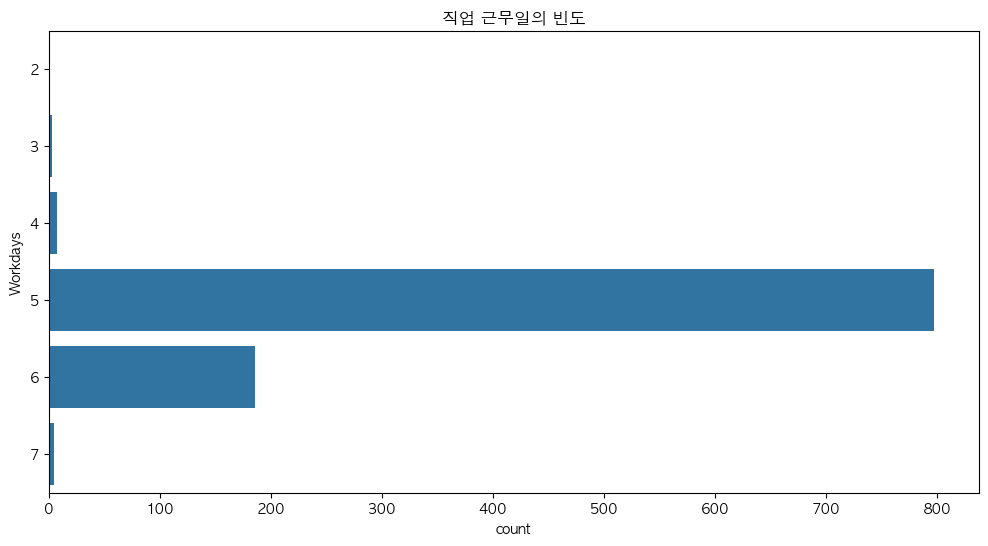

In [30]:
# 데이터 분포 시각화
# 범주형 데이터의 빈도 수를 시각화합니다.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Workdays')
plt.title('직업 근무일의 빈도')
plt.show()

다음으로 `JobEmploymentType` 컬럼을 살펴보겠습니다.

이 컬럼의 데이터는

- 기간의 정함이 없는 근로계약: 76%
- 기간의 정함이 있는 근로계약: 11%
- 기간의 정함이 없는 근로계약(시간(선택)제): 2%
- 기타: 1% ('기간의 정함이 있는 근로계약(시간(선택)제)')

식으로 구성되어 있습니다.

JobEmploymentType 컬럼의 데이터를 전처리하는 과정은 데이터의 정규화 및 분류를 통해 분석 또는 머신러닝 모델링에 적합하게 만드는 작업을 포함합니다.
이 컬럼에 나타난 근로계약 유형에 따라 다음과 같은 단계를 고려할 수 있습니다:

1. 범주화 및 레이블 단순화
복잡하거나 세분화된 범주를 더 큰 범주로 통합하거나, 비슷한 범주를 하나로 묶어서 분석의 효율성을 높일 수 있습니다. 예를 들어, "기간의 정함이 있는 근로계약"과 "기간의 정함이 없는 근로계약"을 각각 "기간 정함", "기간 무정함"으로 단순화하고, "기간의 정함이 없는 근로계약(시간(선택)제)"는 "기간 무정함(파트타임)"과 같이 구분할 수 있습니다.

2. One-Hot Encoding
범주형 데이터를 숫자형 데이터로 변환하는 과정입니다. 머신러닝 모델에서 사용하기 위해 각 범주를 독립적인 컬럼으로 변환하고, 각 컬럼에는 해당 범주에 속하면 1, 아니면 0의 값을 부여합니다.

3. 결측치 처리
"Other" 같은 불명확한 범주를 포함하여 결측치를 적절히 처리하는 것이 중요합니다. "Other" 범주가 구체적인 정보를 제공하지 않는다면, 가장 빈번한 범주로 대체하거나 별도의 "Other" 범주를 유지하는 방법을 선택할 수 있습니다.

4. 데이터 정규화
모든 범주의 비율을 고려하여, 과대표현된 범주를 다운샘플링하거나 과소표현된 범주를 업샘플링하는 기법을 적용할 수 있습니다. 이는 특히 불균형 데이터셋에서 중요한 전략입니다.

이 코드는 데이터프레임 내의 `JobEmploymentType` 열에 대해 범주화 작업을 수행하고, 결과적으로 원-핫 인코딩을 적용합니다. 먼저, `replace` 메소드를 사용하여 `JobEmploymentType` 열의 값들을 더 간단한 형태로 변환합니다. 이 과정에서 네 가지 유형의 근로 계약 조건이 각각 '기간 무정함', '기간 정함', '기간 무정함(파트타임)', '기간 정함(파트타임)'으로 단순화됩니다. 이후, `pd.get_dummies` 함수를 사용하여 해당 열에 대한 원-핫 인코딩을 수행하고, 이를 `df_encoded` 데이터프레임에 저장합니다. 원-핫 인코딩을 통해 각 범주형 값은 고유한 열로 변환되며, 해당 범주에 속하는 관측치는 1의 값을, 그렇지 않은 경우는 0의 값을 갖게 됩니다.

In [31]:
# 범주화 및 레이블 단순화
df['JobEmploymentType'] = df['JobEmploymentType'].replace({
    '기간의 정함이 없는 근로계약': '기간 무정함',
    '기간의 정함이 있는 근로계약': '기간 정함',
    '기간의 정함이 없는 근로계약(시간(선택)제)': '기간 무정함(파트타임)',
    '기간의 정함이 있는 근로계약(시간(선택)제)': '기간 정함(파트타임)'
})

# 원-핫 인코딩
df_encoded = pd.get_dummies(df['JobEmploymentType'])

df_encoded

,기간 무정함,기간 무정함(파트타임),기간 정함,기간 정함(파트타임)
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
995,True,False,False,False
996,True,False,False,False
997,True,False,False,False
998,True,False,False,False


`JobEmploymentType` 컬럼명 변경

`JobEmploymentType` 컬럼명은 일반적으로 근무 유형을 나타내는 데 사용되며, 여기에는 계약의 기간 유무(예: 기간의 정함이 있는 근로계약, 기간의 정함이 없는 근로계약) 등이 포함됩니다. 이 컬럼명은 범주가 계약 유형에 관련된 정보를 포함하고 있기 때문에 적절해 보입니다.

그러나, 더 구체적이거나 명확한 컬럼명이 있을지 생각해 보면

- `ContractType`: 이 컬럼명은 계약의 유형을 직접적으로 나타내며, 기간의 유무뿐만 아니라 계약의 형식(정규직, 계약직, 파트타임 등)을 포괄적으로 나타낼 수 있습니다.

- `EmploymentContractType`: 이 컬럼명은 "계약"과 "고용"을 모두 포함하여, 고용 계약의 성격을 좀 더 명확하게 전달합니다.

- `WorkContractType`: 이 이름도 계약 유형에 초점을 맞추고 있으며, 작업 형태를 포함한 계약의 법적 또는 조직적 성격을 설명할 수 있습니다.

등이 있을 것 같습니다.

저는 `JobEmploymentType`을 `JobContractType`으로 변경해서 진행해 보겠습니다.

`df.rename` 메서드는 데이터프레임의 열 이름을 변경하는 데 사용됩니다. 이 예제에서는 `columns` 매개변수를 사용하여 `'JobEmploymentType'` 열의 이름을 `'JobContractType'`으로 변경합니다. `inplace=True` 옵션은 변경사항을 원본 데이터프레임에 바로 적용하며, 별도의 할당 없이 원본 데이터프레임을 수정합니다.

In [32]:
# 데이터프레임의 열 이름을 'JobEmploymentType'에서 'JobContractType'으로 변경합니다.
df.rename(columns={'JobEmploymentType': 'JobContractType'}, inplace=True) 

`df.head()` 함수는 데이터프레임에서 처음 다섯 행을 반환합니다. 이 함수는 데이터의 구조를 빠르게 파악하고자 할 때 유용하게 사용됩니다.

In [33]:
# 데이터프레임의 처음 다섯 행을 출력합니다.
df.head() 

,JobTitle,CompanyName,CompanyIndustry,CompanySize,JobVolunteerExperience,JobVolunteerEducation,CompanyLocation,JobPayment,WeeklyWorkdays,JobContractType,JobBenefits,RequiredExperienceMonths,PreferredExperienceMonths,MinMonthlyPayment,MaxMonthlyPayment,Workdays
0,단순 포장반직원 모집합니다,주식회사 농생우창,사료 도매업,중소기업,신입,학력무관,충청북도 진천군 이월면 월촌1길 173-13,월급 210만원 ~ 230만원,주 5일 근무,기간 무정함,기숙사제공\n \n ...,None,None,2100000.0,2300000.0,5
1,단순포장 및 락크작업,제이비(주),"도금, 착색 및 기타 표면처리강재 제조업",중소기업,관계없음,학력무관,"인천광역시 남동구 남동대로155번길 56, 제이비(주) (고잔동)",월급 206만원 ~ 230만원,주 5일 근무,기간 무정함,식사제공(중식비지급),None,None,2060000.0,2300000.0,5
2,육류 가공 식당납품,유안축산,육류 가공식품 도매업,NaN,관계없음,학력무관,"경기도 안산시 상록구 장하로 94, 1층 (장하동)",월급 280만원 ~ 300만원,주 5일 근무,기간 무정함,식사제공(1식),None,None,2800000.0,3000000.0,5
3,[이천시 가좌리] 신축빌라 공사현장 잡역부 모집,주식회사에스알종합건설,단독 주택 건설업,중소기업,경력 (최소 1년 0 개월 이상) 우대,학력무관,경기도 이천시 부발읍 가좌로 42,월급 350만원 ~ 350만원,주 6일 근무,기간 무정함,식사제공(중식비지급),None,12,3500000.0,3500000.0,6
4,생산직 채용(당사 제품 생산) 외국인 우대,(주)신화,구조용 금속 판제품 및 공작물 제조업,중소기업,관계없음,학력무관,충청남도 논산시 강경읍 농공단지로 22,월급 206만원 이상,주 5일 근무,기간 무정함,기숙사제공\n 통근버스제공\n ...,None,None,2060000.0,NaN,5


다음으로 `JobBenefits` 컬럼을 살펴보겠습니다.

이 컬럼의 데이터는

- "기숙사제공 식사제공(1식) 자녀학자금지원"

- "기숙사제공 통근버스제공 차량유지비제공 식사제공(1식)"

- "기숙사제공
                    통근버스제공
                    차량유지비제공
                    
                    
                      식사제공(1식)"

식으로 구성되어 있습니다. 

키워드가 되는 "기숙사제공" "식사제공(1식)" 등이 띄어쓰기로 구별되어 있습니다.

나중에 Neo4j 그래프 데이터베이스에 데이터를 주입할 때 각 키워드별로 Node를 만들어 주입할 것입니다.
데이터를 주입할 때 띄어쓰기로 구별해서, 즉 ' ' 구분자로 데이터를 구별해서 데이터를 주입 가능하기 때문에 `JobBenefits`에 대한 데이터는 불필요한 공백만을 제거하고 그대로 두겠습니다.

이 함수는 데이터프레임의 특정 컬럼에서 불필요한 공백을 정규화합니다. `normalize_whitespace` 함수는 텍스트 입력을 받아, 결측치가 아닌 경우, 모든 공백(스페이스, 탭, 줄바꿈 등)을 하나의 스페이스로 변환하고 문자열 양 끝의 공백을 제거합니다. 이 과정은 `pd.isnull`을 사용하여 결측치 여부를 확인하고, `re.sub` 함수를 사용하여 공백을 정규화합니다. 마지막으로, `strip` 메소드를 사용하여 결과 문자열의 양 끝에서 공백을 제거합니다. 이 함수는 `df['JobBenefits']` 컬럼에 적용되어 해당 컬럼의 모든 값에 대해 불필요한 공백을 정규화합니다.

In [35]:
# 불필요한 공백을 정규화하는 함수
def normalize_whitespace(text):
    if pd.isnull(text):
        return text  # 결측치가 있는 경우, 변경 없이 반환
    return re.sub(r'\s+', ' ', text).strip()

# 각 컬럼에 함수 적용
df['JobBenefits'] = df['JobBenefits'].apply(normalize_whitespace)
df['CompanyIndustry'] = df['CompanyIndustry'].apply(normalize_whitespace)

다음으로 `CompanyIndustry` 컬럼을 살펴보겠습니다.

- "고무, 화학섬유 및 플라스틱 성형기 제조업"
- "콘크리트 타일, 기와, 벽돌 및 블록 제조업"
- "상용 인력 공급 및 인사관리 서비스업"
- "금속 문, 창, 셔터 및 관련제품 제조업"
- "시설작물 재배업"

등의 데이터를 확인할 수 있습니다.

데이터의 종류가 너무 다양하기 때문에 데이터를 카테고리화 및 그룹화하기 굉장히 까다로울 것 같습니다.

다음은 `CompanyIndustry` 컬럼에 나타난 다양한 산업 분야 데이터를 전처리하는 과정은 데이터를 좀 더 관리하기 쉽고 분석적으로 유용하게 만들기 위한 몇 가지 방법입니다.

1. 데이터 카테고리화 및 그룹화
   산업 분야를 보다 큰 카테고리로 그룹화: 예를 들어, "고무, 화학섬유 및 플라스틱 성형기 제조업", "콘크리트 타일, 기와, 벽돌 및 블록 제조업" 등은 모두 "제조업"으로 그룹화할 수 있습니다.
   비슷한 특성을 공유하는 산업을 통합: "상용 인력 공급 및 인사관리 서비스업" 같은 서비스업은 "서비스업" 카테고리로 통합할 수 있습니다.

2. One-Hot Encoding 또는 Label Encoding
   One-Hot Encoding: 산업 분류를 이진 특성으로 변환하여 모델링에 사용할 수 있습니다. 이 방법은 범주가 많을 때 특성 차원이 매우 커질 수 있음을 고려해야 합니다.
   Label Encoding: 각 산업 분류를 고유한 정수로 변환합니다. 이 방법은 순서가 없는 범주에 대해 모델이 잘못된 순서 정보를 학습할 수 있다는 단점이 있습니다.

3. 텍스트 데이터 정제
   텍스트 정규화: 텍스트를 표준화하여 일관된 형식을 유지합니다. 예를 들어, "그 외 기타 분류 안된 금속 가공 제품 제조업"을 "기타 금속 제조업"으로 단순화할 수 있습니다.
   불필요한 문자 제거: 쉼표, 특수 문자 등을 제거하여 데이터의 깔끔함을 유지합니다.

`CompanyIndustry` 컬럼과 같은 텍스트 데이터를 분석하고 그룹화하는데 TF-IDF (Term Frequency-Inverse Document Frequency) 방식을 사용하는 것은 특정 산업 분야에 특징적인 단어의 중요성을 파악하는 데 유용할 수 있습니다. TF-IDF는 문서 내에서 자주 등장하지만, 다른 문서에서는 드물게 나타나는 단어에 높은 가중치를 부여하는 통계적 방법으로, 텍스트 데이터의 특성을 수치화하여 다양한 기계 학습 알고리즘에 입력할 수 있는 형태로 변환하는 데 적합합니다.

TF-IDF를 사용하는 이유:
1. 특징 단어 강조: TF-IDF는 산업 분야를 설명하는 핵심 단어를 강조하며, 이러한 단어들은 해당 산업을 다른 산업과 구별하는 데 중요한 역할을 합니다.

2. 차별화된 정보 제공: 각 산업별로 고유한 단어 또는 표현이 사용되는데, 이를 통해 산업들을 더 명확히 구분할 수 있습니다.
3. 데이터 전처리 및 분석 용이성: 벡터 형태로 변환된 데이터는 클러스터링, 분류, 차원 축소 등 다양한 데이터 과학 기법에 쉽게 적용될 수 있습니다.

TF-IDF 적용 방법:
1. 데이터 전처리: 텍스트 데이터를 소문자로 변환하고, 특수 문자 및 불필요한 공백을 제거합니다.

2. TF-IDF 변환: Scikit-learn 라이브러리의 TfidfVectorizer를 사용하여 데이터를 TF-IDF 벡터로 변환합니다.
3. 클러스터링 또는 분류: 변환된 데이터를 기반으로 클러스터링(K-means, 계층적 클러스터링 등) 또는 분류(랜덤 포레스트, SVM 등) 알고리즘을 적용합니다.

이 코드는 데이터프레임 `df`의 'CompanyIndustry' 열에 대해 결측치를 'unknown'으로 대체하고, 해당 열의 텍스트 데이터를 TF-IDF 벡터로 변환합니다. 변환된 데이터는 `KMeans` 클러스터링 알고리즘을 사용하여 3개의 클러스터로 분류됩니다. 마지막으로, 각 데이터 포인트에 대한 클러스터 레이블이 데이터프레임에 'Cluster' 열로 추가되며, 최종 데이터프레임이 출력됩니다.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 결측치를 'unknown'으로 대체
df['CompanyIndustry'].fillna('unknown', inplace=True)

# TF-IDF 변환
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['CompanyIndustry'])

# 클러스터링
kmeans = KMeans(n_clusters=3)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

# 결과 추가
df['Cluster'] = labels

# 최종 출력
df.head()

/var/folders/8l/h9gthwnn40gcs_zb4k3g4_z40000gn/T/ipykernel_15496/2331501880.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompanyIndustry'].fillna('unknown', inplace=True)


,JobTitle,CompanyName,CompanyIndustry,CompanySize,JobVolunteerExperience,JobVolunteerEducation,CompanyLocation,JobPayment,WeeklyWorkdays,JobContractType,JobBenefits,RequiredExperienceMonths,PreferredExperienceMonths,MinMonthlyPayment,MaxMonthlyPayment,Workdays,Cluster
0,단순 포장반직원 모집합니다,주식회사 농생우창,사료 도매업,중소기업,신입,학력무관,충청북도 진천군 이월면 월촌1길 173-13,월급 210만원 ~ 230만원,주 5일 근무,기간 무정함,기숙사제공 식사제공(1식) 자녀학자금지원,None,None,2100000.0,2300000.0,5,0
1,단순포장 및 락크작업,제이비(주),"도금, 착색 및 기타 표면처리강재 제조업",중소기업,관계없음,학력무관,"인천광역시 남동구 남동대로155번길 56, 제이비(주) (고잔동)",월급 206만원 ~ 230만원,주 5일 근무,기간 무정함,식사제공(중식비지급),None,None,2060000.0,2300000.0,5,2
2,육류 가공 식당납품,유안축산,육류 가공식품 도매업,NaN,관계없음,학력무관,"경기도 안산시 상록구 장하로 94, 1층 (장하동)",월급 280만원 ~ 300만원,주 5일 근무,기간 무정함,식사제공(1식),None,None,2800000.0,3000000.0,5,0
3,[이천시 가좌리] 신축빌라 공사현장 잡역부 모집,주식회사에스알종합건설,단독 주택 건설업,중소기업,경력 (최소 1년 0 개월 이상) 우대,학력무관,경기도 이천시 부발읍 가좌로 42,월급 350만원 ~ 350만원,주 6일 근무,기간 무정함,식사제공(중식비지급),None,12,3500000.0,3500000.0,6,0
4,생산직 채용(당사 제품 생산) 외국인 우대,(주)신화,구조용 금속 판제품 및 공작물 제조업,중소기업,관계없음,학력무관,충청남도 논산시 강경읍 농공단지로 22,월급 206만원 이상,주 5일 근무,기간 무정함,기숙사제공 통근버스제공 차량유지비제공 식사제공(1식),None,None,2060000.0,NaN,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,용접사(외국인력 우대) 정규직 모집,주식회사다산이엔지,반도체 제조용 기계 제조업,중소기업,신입,학력무관,경기도 화성시 기산말길 71,월급 206만원 이상,주 5일 근무,기간 무정함,식사제공(2식),None,None,2060000.0,NaN,5,2
996,"토마토,메론 하우스 재배 작업자 구인",정관수,채소작물 재배업,NaN,관계없음,학력무관,"전라북도 전주시 덕진구 신흥마을길 101-9, (고랑동 605-8,고랑동 60...","시급 9,860원 이상",주 6일 근무,기간 무정함,NaN,None,None,1577600.0,NaN,6,0
997,작물재배 단순노무,노두진농장,작물재배 및 축산 복합농업,NaN,관계없음,학력무관,경기도 이천시 신둔면 황무로617번길 87-22,"시급 9,860원 이상",주 6일 근무,기간 무정함,NaN,None,None,1577600.0,NaN,6,0
998,레디얼 작업 및 단순사상원 (보조원) 모집,주식회사 케이디정밀,그 외 기타 특수목적용 기계 제조업,NaN,신입,학력무관,경기도 화성시 팔탄면 버들로1318번길 12-51,월급 230만원 이상,주 5일 근무,기간 무정함,식사제공(1식),None,None,2300000.0,NaN,5,2


`df['Cluster'].value_counts()` 함수는 데이터프레임 내에서 'Cluster' 열의 각 값이 몇 번 나타나는지를 계산하여 반환합니다. 이는 데이터 내 특정 그룹의 크기를 이해하거나, 데이터 분포를 분석할 때 유용하게 사용됩니다.

In [37]:
# 데이터프레임의 'Cluster' 열에 대한 값의 빈도수를 계산합니다.
df['Cluster'].value_counts() 

Cluster
2    514
0    382
1    104
Name: count, dtype: int64

이 함수는 데이터프레임 `df`에서 고유한 클러스터를 찾아, 각 클러스터에 속하는 회사들의 산업 분야(`CompanyIndustry`)를 집계합니다. 각 클러스터별로 주요 산업 분야를 내림차순으로 출력하여, 해당 클러스터가 어떤 산업 분야에 집중되어 있는지 파악할 수 있습니다.

In [38]:
# 클러스터 별 주요 산업 분야 출력
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster]['CompanyIndustry'].value_counts())


Cluster 0:
CompanyIndustry
양돈업                          12
한식 일반 음식점업                   11
상용 인력 공급 및 인사관리 서비스업         11
육류 포장육 및 냉동육 가공업 (가금류 제외)    10
채소작물 재배업                      9
                             ..
일반 화물자동차 운송업                  1
중고 자동차 판매업                    1
보관 및 창고업                      1
기타 통신 판매업                     1
그 외 기타 건축자재 도매업               1
Name: count, Length: 161, dtype: int64

Cluster 1:
CompanyIndustry
unknown    104
Name: count, dtype: int64

Cluster 2:
CompanyIndustry
그 외 자동차용 신품 부품 제조업    36
그 외 기타 플라스틱 제품 제조업    19
자동차 차체용 신품 부품 제조업     16
그 외 기타 식료품 제조업        16
주형 및 금형 제조업           15
                      ..
천막, 텐트 및 유사 제품 제조업     1
위생용 종이제품 제조업           1
항공기용 부품 제조업            1
액상시유 및 기타 낙농제품 제조업     1
가공 및 정제염 제조업           1
Name: count, Length: 171, dtype: int64


위의 결과를 보면 클러스터가 3개로 나뉘어진 것을 확인해 볼 수 있습니다.

- 0번 클러스터는 주로 "플라스틱과 관련된 제조업"과 관련된 클러스터로 묶인 것을 볼 수 있고

- 1번 클러스터는 주로 "그외 제조업"과 관련된 클러스터로 묶인 것을 볼 수 있습니다.

- 그리고 2번 클러스터는 주로 "서비스업"과 관련된 클러스터로 묶인 것을 볼 수 있습니다.

이 함수는 데이터프레임 `df`에서 'Cluster' 열의 값이 1인 행들을 필터링하고, 그 중 'CompanyIndustry' 열의 값들을 집계하여 가장 많이 나타나는 상위 60개 산업 분야를 출력합니다. 결과는 클러스터 1에 속하는 회사들이 주로 어떤 산업 분야에 집중되어 있는지를 보여줍니다.

In [39]:
# 클러스터 1의 주요 산업 분야 출력
print("\nCluster 1:")
print(df[df['Cluster'] == 1]['CompanyIndustry'].value_counts()[0:60])


Cluster 1:
CompanyIndustry
unknown    104
Name: count, dtype: int64


1번 클러스터를 좀 더 자세하게 살펴보면 제조업, 음식점업, 여행사업, 건조업, 소매업 등 여러 가지 카테고리가 섞여 있는 것을 볼 수 있습니다.

다음으로 클러스터의 개수를 5개로 확장해서 결과를 확인해 보겠습니다.

이 코드는 데이터프레임의 `CompanyIndustry` 열을 사용하여 TF-IDF 변환을 수행합니다. 변환된 데이터는 `TfidfVectorizer`를 통해 생성되며, 이후 K-평균 클러스터링을 사용하여 데이터를 8개의 클러스터로 분류합니다. 클러스터링 결과는 데이터프레임의 `Cluster_8` 열에 저장됩니다.

In [40]:
# TF-IDF 변환
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['CompanyIndustry'])

# 클러스터링 (클러스터 수를 8로 설정)
kmeans_8 = KMeans(n_clusters=8)
labels_8 = kmeans_8.fit_predict(tfidf_matrix)
df['Cluster_8'] = labels_8

`df['Cluster_8'].value_counts()` 함수는 데이터프레임의 `'Cluster_8'` 열에 있는 각 값의 출현 빈도를 계산합니다. 이는 데이터 내 특정 그룹의 크기를 이해하거나, 데이터 분포를 분석할 때 유용하게 사용됩니다.

In [41]:
# 'Cluster_8' 열의 각 값별로 개수를 세어 반환합니다.
df['Cluster_8'].value_counts() 

Cluster_8
4    696
2    104
3     58
6     53
7     43
5     29
1     15
0      2
Name: count, dtype: int64

이 코드는 데이터프레임 `df`에서 클러스터 별 주요 산업 분야의 빈도수를 계산하고, 이를 기반으로 각 클러스터에 대한 정보를 포함하는 새로운 데이터프레임을 생성합니다. 먼저, `df['Cluster_8']`의 고유값을 기준으로 각 클러스터에 대한 반복 작업을 수행합니다. 이 과정에서, 각 클러스터 내의 산업(`CompanyIndustry`) 빈도수를 계산하고, 이를 `all_clusters` 리스트에 추가합니다. 그 후, `pd.concat` 함수를 사용하여 모든 클러스터 데이터를 하나의 데이터프레임 `final_df`로 합칩니다. 마지막으로, `final_df`를 먼저 `Count` 컬럼에 따라 내림차순으로, 그리고 `Cluster` 컬럼에 따라 오름차순으로 정렬합니다. 이 과정을 통해, 각 클러스터 내에서 가장 빈번한 산업 분야를 쉽게 식별할 수 있습니다.

In [42]:
# 클러스터 별 주요 산업 분야를 데이터프레임으로 구성
all_clusters = []
for cluster in sorted(df['Cluster_8'].unique()):
    # 클러스터 별 산업 빈도수 계산
    cluster_data = df[df['Cluster_8'] == cluster]['CompanyIndustry'].value_counts().reset_index()
    cluster_data.columns = ['CompanyIndustry', 'Count']
    cluster_data['Cluster'] = cluster
    all_clusters.append(cluster_data)

# 모든 클러스터 데이터를 하나의 데이터프레임으로 합치기
final_df = pd.concat(all_clusters).reset_index(drop=True)

# 결과를 'Count' 컬럼 기준으로 내림차순 정렬
final_df = final_df.sort_values(by='Count', ascending=False)
# 클러스터 별로 정렬
final_df = final_df.sort_values(by='Cluster', ascending=True)

final_df

,CompanyIndustry,Count,Cluster
0,기타 보관 및 창고업,1,0
1,보관 및 창고업,1,0
2,자동차 및 트레일러 제조업,7,1
7,자동차 종합 수리업,1,1
4,자동차 재제조 부품 제조업,2,1
...,...,...,...
324,기타 전문 서비스업,2,7
323,기타 법무관련 서비스업,2,7
318,그 외 기타 비거주 복지 서비스업,5,7
327,"화물 포장, 검수 및 계량 서비스업",1,7


이 함수는 `final_df` 데이터프레임에서 `'Cluster'` 열의 값이 `0`인 행들 중 첫 30개를 선택합니다. 이는 특정 클러스터에 속하는 데이터 포인트들을 빠르게 검토하고자 할 때 유용합니다.

In [43]:
# 클러스터 값이 0인 첫 30개의 행을 선택합니다.
final_df[final_df['Cluster'] == 0][:30]  

,CompanyIndustry,Count,Cluster
0,기타 보관 및 창고업,1,0
1,보관 및 창고업,1,0


이 함수는 `final_df` 데이터프레임에서 특정 조건을 만족하는 행을 필터링합니다. 조건은 'Cluster' 열의 값이 0이고, 'CompanyIndustry' 열의 문자열이 '제조업'으로 끝나지 않는 행을 대상으로 합니다. 이후, 해당 조건을 만족하는 행 중 처음 60개를 선택합니다. 이는 데이터 분석에서 특정 그룹의 데이터를 선별적으로 검토하고자 할 때 유용하게 사용될 수 있습니다.

In [44]:
# 클러스터 번호가 0이고, 회사 산업이 '제조업'으로 끝나지 않는 행의 처음 60개를 선택합니다.
final_df[(final_df['Cluster'] == 0) & ~final_df['CompanyIndustry'].str.endswith('제조업')][:60] 

,CompanyIndustry,Count,Cluster
0,기타 보관 및 창고업,1,0
1,보관 및 창고업,1,0


8개의 클러스터로 구별된 데이터프레임에서 0번째 클러스터는 총 393개가 추출되었고

제조, 창고, 주조, 소매, 운영, 학원, 도금업 등 다양한 카테고리의 산업이 혼재되어 있는 것으로 보입니다.

이 함수는 `final_df` 데이터프레임에서 `'Cluster'` 열의 값이 `1`인 행들 중 상위 `30`개를 선택합니다. 이는 특정 클러스터에 속하는 데이터 포인트들을 빠르게 검토하고자 할 때 유용합니다.

In [45]:
# 클러스터 값이 1인 상위 30개의 행을 선택합니다.
final_df[final_df['Cluster'] == 1][:30] 

,CompanyIndustry,Count,Cluster
2,자동차 및 트레일러 제조업,7,1
7,자동차 종합 수리업,1,1
4,자동차 재제조 부품 제조업,2,1
6,자동차 제조업,1,1
3,승용차 및 기타 여객용 자동차 제조업,3,1
5,중고 자동차 판매업,1,1


`final_df`에서 `'Cluster'` 열의 값이 1이며, `'CompanyIndustry'` 열의 값이 '제조업'으로 끝나지 않는 행들 중 처음 60개를 선택하는 방법을 보여줍니다. 이는 특정 클러스터에 속하면서 특정 산업군에 속하지 않는 회사들을 필터링하는 데 사용될 수 있습니다.

In [46]:
# 'Cluster' 값이 1이고, 'CompanyIndustry'가 '제조업'으로 끝나지 않는 행 중 처음 60개를 선택합니다.
final_df[(final_df['Cluster'] == 1) & ~final_df['CompanyIndustry'].str.endswith('제조업')][:60] 

,CompanyIndustry,Count,Cluster
7,자동차 종합 수리업,1,1
5,중고 자동차 판매업,1,1


1번 클러스터는 주로 제조업으로 구분되어 있고 "기타" 텍스트가 포함된 항목들이 부분적으로 끼어들어간 것으로 보입니다.

2번 클러스터는 주로 "음식점"과 관련된 항목들이 묶여있고
3번 클러스터는 모두 "unknown"이며
4번 클러스터는 주로 "금속", "기계"와 같은 항목으로 묶여 있었습니다.

이와 같이 `TF-IDF`로 분석하는 방법은 **키워드**(핵심 단어)의 출연빈도를 통해서 분류하는 방법으로 해당 산업을 다른 산업과 구별하는데 나쁘지 않은 방법인 것 같습니다.
하지만 `Cluster`의 수를 3 또는 5, 8로 나뉘어지게 하는 파라미터 설정은 해당 데이터의 특성에 따라 잘 조정해야 할 것 같습니다.

이와 같이 `TF-IDF`로 분석하는 방법은 **키워드**(핵심 단어)의 출연빈도를 통해서 분류하는 방법으로 해당 산업을 다른 산업과 구별하는데 나쁘지 않은 방법인 것 같습니다.
하지만 `Cluster`의 수를 3 또는 5, 8로 나뉘어지게 하는 파라미터 설정은 해당 데이터의 특성에 따라 잘 조정해야 할 것 같습니다.


추후 `'CompanyIndustry'`에 대한 컬럼에 대한 데이터분석은 `Neo4j Graph Data Science (GDS)` 라이브러리를 사용하여 유사도를 계산하는 방법으로 사용해 볼 예정입니다.

이 시리즈의 다음 내용으로는 "크롤링한 직업데이터 전처리하기 2번째" 제목으로 작성 할 예정이며 `'CompanyLocation'`에 대한 전처리, 즉 시군구에 대한 데이터를 추출하는 것을 목표로 해보겠습니다.